# Graph Analysis
### Eigenvector centrality
**Eigenvector centrality** measures a node's importance based on the importance of its neighbors. 
- Important nodes are connected to other important nodes.

A node with high eigenvector centrality means it is well-connected to other important/well-connected nodes. In other words:
- It's connected to influential neighbors.
- It's in the center of influential clusters.
- It has high-quality connections (not just many connections).

<hr>

We may use the **power iteration** algorithm to obtain the eigenvector centrality:
1. Initialize all nodes with equal centrality
2. Repeatedly update: new_centrality = sum(neighbors' current centrality)
3. Normalize after each update
4. Stop when values stabilize

**Hint:** In **disconnected** graphs, we should use the **power iteration** for each **component** separately.
<hr>

In the following:
- We implement the **power iteration** algorithm to estimate the eigenvector centrality for **unweighted** graphs. Then, we test the algorithm with four different unweighted graphs.
- As a bonus, we implement the **power iteration** algorithm to estimate the eigenvector centrality for **weighted** graphs. Also, we test this algorithm with two weighted graphs.
- With some helper functions, we display the graphs using the functions of **NetworkX**.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def eigenvector_centrality_unweighted(adj_list, max_iter=100, 
                                      tol=1e-6, alpha=1,normalized=True):
    """
    Calculate eigenvector centrality using power iteration method
    Parameters:
    - adj_list: {node: [neighbors]} - adjacency list representation
    - max_iter: maximum iterations
    - tol: convergence tolerance
    - alpha: identity matrix coefficient. Adds αI to adjacency matrix to ensure convergence.
    - normalized: whether to normalize results
    
    Returns:
    - Dictionary of node -> eigenvector centrality
    """
    if not adj_list:
        return {}
    
    nodes = list(adj_list.keys())
    n = len(nodes)
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # Initialize with uniform values
    x = np.ones(n) #random.rand(n)
    x = x / np.linalg.norm(x, 2)
    for iteration in range(max_iter):
        x_old = x.copy()
        x_new = np.zeros(n)
        
        for i, node in enumerate(nodes):
            # Add identity matrix for convergence
            x_new[i] += x_old[i]
            
            # Neighbor contributions (main part)
            for neighbor in adj_list.get(node, []):
                j = node_to_idx[neighbor]
                x_new[i] += x_old[j]  # This is correct
        
        # Normalize by largest eigenvalue (approximation)
        lambda_approx = np.linalg.norm(x_new, 2)
        if lambda_approx < tol:
            break
            
        x = x_new / lambda_approx
        
        # Check convergence
        if np.linalg.norm(x - x_old, 2) < tol:
            pass #break
    
    # Convert to dictionary
    centrality = {node: x[i] for i, node in enumerate(nodes)}
    
    if normalized:
        # Normalize to sum to 1
        total = sum(centrality.values())
        if total > 0:
            centrality = {node: score/total for node, score in centrality.items()}
    return centrality

In [3]:
# Example 1: Star graph with 5 nodes (node 0 is center)
star_graph = {
    0: [1, 2, 3, 4],
    1: [0],
    2: [0],
    3: [0],
    4: [0]
}
# Center has highest centrality
closeness = eigenvector_centrality_unweighted(star_graph)
print("Star Graph Eigenvector Centrality (normalized):")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")

Star Graph Eigenvector Centrality (normalized):
Node 0: 0.333
Node 1: 0.167
Node 2: 0.167
Node 3: 0.167
Node 4: 0.167


In [4]:
# Example 2, Line graph: 0-1-2-3-4
line_graph = {
    0: [1],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4],
    4: [3]
}

eigenvector = eigenvector_centrality_unweighted(line_graph)
print("Line Graph - Eigenvector Centrality (normalized):")
for node, score in sorted(eigenvector.items()):
    print(f"  Node {node}: {score:.4f}")

Line Graph - Eigenvector Centrality (normalized):
  Node 0: 0.1340
  Node 1: 0.2321
  Node 2: 0.2679
  Node 3: 0.2321
  Node 4: 0.1340


In [5]:
# Example 3, Complete graph
complete_graph = {
    0: [1, 2, 3],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2]
}

eigenC = eigenvector_centrality_unweighted(complete_graph)
print("Complete Graph Eigenvector Centrality:")
for node, score in sorted(eigenC.items()):
    print(f"Node {node}: {score:.3f}")

Complete Graph Eigenvector Centrality:
Node 0: 0.250
Node 1: 0.250
Node 2: 0.250
Node 3: 0.250


<hr style="height:3px;background-color:orange">

# Helper functions
### Helper functions to display graphs with NetworkX

In [6]:
# Helper functions to draw the graphs 
def networkx_to_adjacency(nx_graph, weighted=False):
    """
    Convert NetworkX graph to adjacency list with weighted and directed options
    Parameters:
    - nx_graph: NetworkX graph object
    - weighted: if True, include edge weights
    Returns:
    - adj_list: adjacency list representation
    """
    adj_list = {}
    
    for node in nx_graph.nodes():
        if weighted:
            # For weighted graphs: {neighbor: weight}
            adj_list[node] = {}
            for neighbor, edge_data in nx_graph[node].items():
                weight = edge_data.get('weight', 1.0)  # Default weight = 1 if not specified
                adj_list[node][neighbor] = weight
        else:
            # For unweighted graphs: list of neighbors
            adj_list[node] = list(nx_graph.neighbors(node))
    return adj_list

#--------------------

def adjacency_to_networkx(adj_list,weighted=False,directed=False):
    """
    Convert adjacency list to NetworkX graph for visualization
    """
    if directed:
        G=nx.DiGraph()
    else:
        G = nx.Graph()
        
    for node, neighbors in adj_list.items():
        if weighted and isinstance(neighbors, dict):
            # Weighted graph: neighbors is {neighbor: weight}
            for neighbor, weight in neighbors.items():
                G.add_edge(node, neighbor, weight=weight)
        else:
            # Unweighted graph: neighbors is list
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    
    return G

In [7]:
# Example 4: Zachary's karate club graph
# Load the network
G_kc = nx.karate_club_graph()

# Convert to adjacency list
adj_list_kc = networkx_to_adjacency(G_kc)
eigenvector_kc = eigenvector_centrality_unweighted(adj_list_kc,normalized=False)
print("Eigenvector Centrality for karate club network:")
for node, score in sorted(eigenvector_kc.items(), key=lambda x: x[1], reverse=True):
    print(f"{node:2}: {score:.4f}",end=', ')
    
# # comparison with eigenvector of NetWorkX
# ec_nx=sorted(nx.eigenvector_centrality(G_kc).items(), key=lambda x: x[1],reverse=True)
# print('\n---Results from Eigenvector of Networkx---')
# for node, score in ec_nx:
#     print(f"{node:2}: {score:.4f}",end=', ')

Eigenvector Centrality for karate club network:
33: 0.3734,  0: 0.3555,  2: 0.3172, 32: 0.3086,  1: 0.2660,  8: 0.2274, 13: 0.2265,  3: 0.2112, 31: 0.1910, 30: 0.1748,  7: 0.1710, 23: 0.1501, 19: 0.1479, 29: 0.1350, 27: 0.1335, 28: 0.1311,  9: 0.1027, 14: 0.1014, 15: 0.1014, 18: 0.1014, 20: 0.1014, 22: 0.1014, 17: 0.0924, 21: 0.0924, 12: 0.0843,  5: 0.0795,  6: 0.0795,  4: 0.0760, 10: 0.0760, 26: 0.0756, 25: 0.0592, 24: 0.0571, 11: 0.0529, 16: 0.0236, 

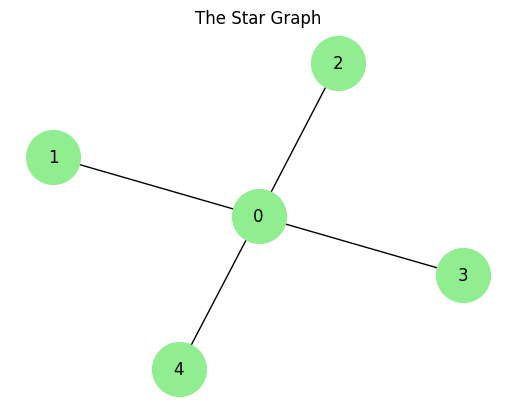

In [8]:
# The star graph 
G_star=adjacency_to_networkx(star_graph)
plt.title('The Star Graph')
nx.draw(G_star,with_labels=True,node_size=1500,node_color='lightgreen')

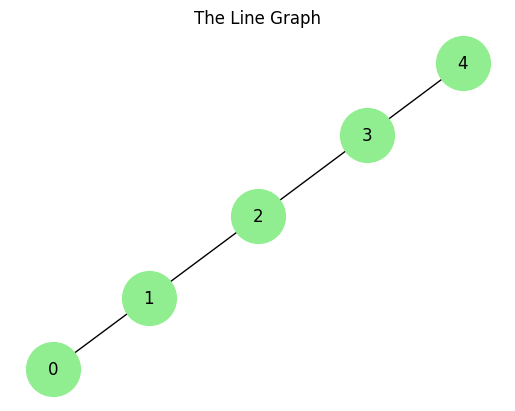

In [9]:
# The line graph 
G_line=adjacency_to_networkx(line_graph)
plt.title('The Line Graph')
nx.draw(G_line,with_labels=True,node_size=1500,node_color='lightgreen')

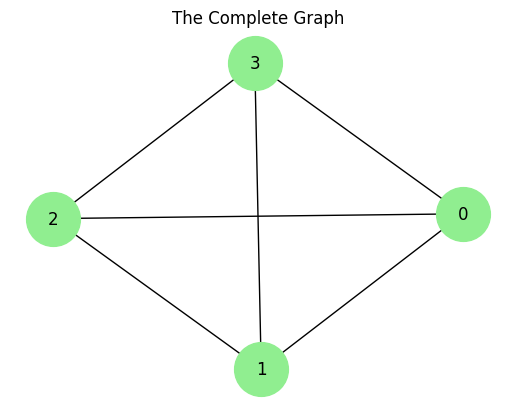

In [10]:
# The graph of complete graph 
G_complete=adjacency_to_networkx(complete_graph)
plt.title('The Complete Graph')
nx.draw(G_complete,with_labels=True,node_size=1500,node_color='lightgreen')

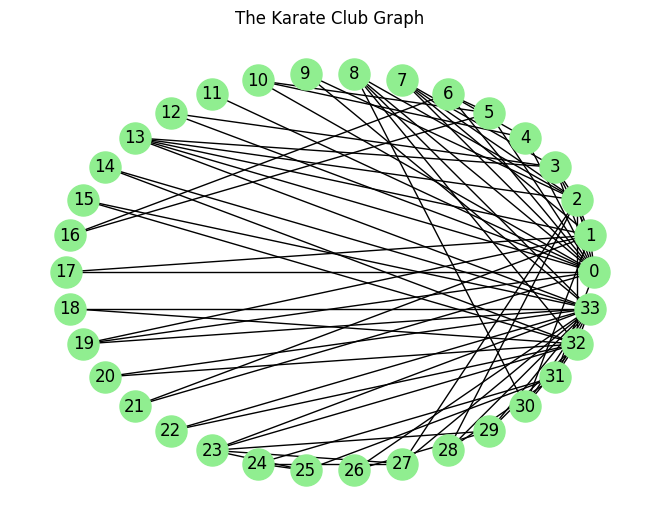

In [11]:
# THe graph of karate club 
pos=nx.circular_layout(G_kc,scale=3)
nx.draw(G_kc,pos,with_labels=True,node_size=500,node_color='lightgreen')
plt.title('The Karate Club Graph')
plt.show()

# Bonus
### Eigenvector centrality for weighted graphs

In [12]:
def eigenvector_centrality_weighted(weighted_adj_dict, max_iter=100, 
                                    tol=1e-6, alpha=1,normalized=True):
    """
    Calculate eigenvector centrality for weighted graphs using power iteration method
    
    Parameters:
    - weighted_adj_dict: dict[node] -> dict[neighbor] -> weight
    - max_iter: maximum iterations
    - tol: convergence tolerance
    - alpha: identity matrix coefficient. Adds αI to adjacency matrix to ensure convergence.
    - normalized: whether to normalize results
    
    Returns:
    - Dictionary of node -> eigenvector centrality
    """
    if not weighted_adj_dict:
        return {}
    
    nodes = list(weighted_adj_dict.keys())
    n = len(nodes)
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # Initialize with uniform values
    x = np.ones(n)
    x = x / np.linalg.norm(x, 2)
    
    for iteration in range(max_iter):
        x_old = x.copy()
        x_new = np.zeros(n)
        
        for i, node in enumerate(nodes):
            # Add a portion of identity matrix for convergence
            x_new[i] += alpha * x_old[i]
            
            # Neighbor contributions with weights
            for neighbor, weight in weighted_adj_dict.get(node, {}).items():
                j = node_to_idx[neighbor]
                x_new[i] += weight * x_old[j]  # Multiply by weight
        
        # Normalize by largest eigenvalue (approximation)
        lambda_approx = np.linalg.norm(x_new, 2)
        if lambda_approx < tol:
            break
            
        x = x_new / lambda_approx
        
        # Check convergence
        if np.linalg.norm(x - x_old, 2) < tol:
            pass  # break
    
    # Convert to dictionary
    centrality = {node: x[i] for i, node in enumerate(nodes)}
    
    if normalized:
        # Normalize to sum to 1
        total = sum(centrality.values())
        if total > 0:
            centrality = {node: score/total for node, score in centrality.items()}
    
    return centrality

In [13]:
# Example W1: Weighted star graph
weighted_star = {
    0: {1: 2, 2: 1, 3: 3, 4: 1},  # Center to periphery with different weights
    1: {0: 2}, 2: {0: 1}, 3: {0: 3}, 4: {0: 1}
}

print("Weighted Star Graph:")
result = eigenvector_centrality_weighted(weighted_star)
for node, score in sorted(result.items()):
    print(f"  Node {node}: {score:.4f}")

Weighted Star Graph:
  Node 0: 0.3562
  Node 1: 0.1839
  Node 2: 0.0920
  Node 3: 0.2759
  Node 4: 0.0920


In [14]:
# Example W2: Social network with interaction strengths
social_network = {
    'Alice': {'Bob': 3, 'Charlie': 1},
    'Bob': {'Alice': 3, 'Charlie': 2, 'David': 1},
    'Charlie': {'Alice': 1, 'Bob': 2, 'David': 2},
    'David': {'Bob': 1, 'Charlie': 2, 'Eve': 3},
    'Eve': {'David': 3}
}

print("Social Network (weights = interaction strength):")
result = eigenvector_centrality_weighted(social_network)
for node, score in sorted(result.items()):
    print(f"-> {node}: {score:.4f}")

Social Network (weights = interaction strength):
-> Alice: 0.1911
-> Bob: 0.2454
-> Charlie: 0.2214
-> David: 0.2140
-> Eve: 0.1281
